In [1]:
from scipy.stats import binom
import numpy as np
import math
from scipy.stats import poisson
import matplotlib.pyplot as plt
from scipy.stats import geom
from scipy.stats import nbinom

In [8]:
#inbuilt functions
prob=binom.pmf(18,20,0.8) # k = x , n = ? , p = ? 
prob

0.13690942867206304

In [10]:
def binomial_prob(n,p,x): #user defined function
    b = (math.factorial(n)/(math.factorial(x)*math.factorial(n-x)))*(p**x)*((1-p)**(n-x))
    return b

In [12]:
binomial_prob(6,0.5,3)

0.3125

In [13]:
prob=binom.pmf(3,6,0.5) 
print(prob)

0.3125000000000002


In [16]:
# find probability of having at least 2 defects in a batch of production line. where the probability of getting defect is 0.12.
n=10
p=0.12
#x= 2, 3 , 4 ,5 ......10
#using loop for x = x+1 till n
sum(binomial_prob(n,p,x) for x in range(2,11))

0.3417249657959586

In [18]:
# Poissons distribution
def poisson_dist(x,lambd):
    return (lambd ** x * np.exp(-lambd))/np.math.factorial(x)


In [20]:
x=4
lambd=3
poisson_dist(x,lambd)

0.16803135574154082

In [24]:
poisson.pmf(4,3)

0.16803135574154085

In [27]:
#p=probability of success (defects) in each trial = 1/3
#x= number of trials = 5

In [28]:
def geometric_prob(p,x):
    q=(1-p)**(x-1)*p
    return q

p= 1/3
x=5
q=geometric_prob(p,x)
q

0.06584362139917699

In [29]:
lambd = 2
k_axis =np.arange(0,25)
k_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [34]:
k_axis.shape

(25,)

In [35]:
distribution = np.zeros(k_axis.shape[0])

In [37]:
for i in range(k_axis.shape[0]):
    distribution[i] = poisson.pmf(i, lambd)
    

<BarContainer object of 25 artists>

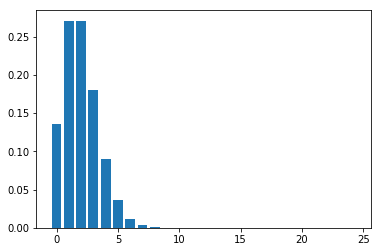

In [40]:
plt.bar(k_axis,distribution)

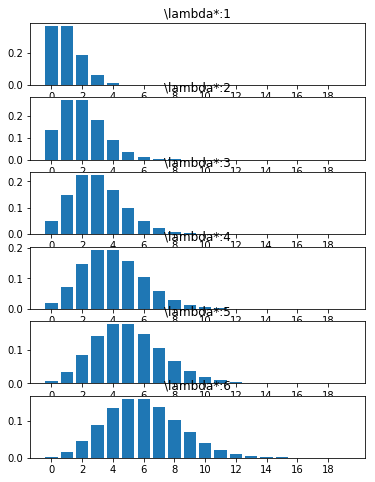

In [42]:
#Lambda increase in range 1 , 7
fig,axes=plt.subplots(6,figsize=(6,8))
for lambd in range(1,7):
    k_aixs=np.arange(0,20)
    distribution=np.zeros(k_aixs.shape[0])
    for i in range(k_aixs.shape[0]):
        distribution[i]=poisson.pmf(i,lambd)
        
    axes[lambd-1].bar(k_aixs,distribution)
    axes[lambd-1].set_xticks(np.arange(0,20,2))
    axes[lambd-1].set_title(f"\lambda*:{lambd}")
    

In [43]:
#Geometric Distribution
g=0
for i in range(1,6):
    g +=geometric_prob(p,i)

print(g)

0.8683127572016461


In [48]:
#geometric distribution

p=0.3
n=5
geom_pd=geom.pmf(n,p)

In [49]:
print(geom_pd)

0.07202999999999998


In [33]:
nbiom1=nbinom.pmf(3,6,0.5)

In [34]:
print(nbiom1)

0.10937500000000021


## Negative Distribution Formula 

In [15]:
#negative distribution formula

def negative_bino(r,n,p):
    negbn=(math.factorial(n-1)/(math.factorial(r-1)**math.factorial(n-r)))*(p**r)*((1-p)**(n-r))
    return negbn

In [35]:
p=0.7
r=3
n=5
negbn=negative_bino(r,n,p)
print(negbn)

0.18522


## Normal Distribution

In [22]:
import math
def normal_prob(miu,stdev,x):
    return 0.5 * (1+math.erf((x-miu)/(stdev*2**0.5)))
miu=20
stdev=2
print(normal_prob(miu,stdev,19.5))
print('%.3f' %normal_prob(miu, stdev, 19.5) )

0.4012936743170763
0.401


In [23]:
print(normal_prob(miu,stdev,22)-normal_prob(miu,stdev,20))
print( '%.3f' %(normal_prob(miu, stdev, 22) - normal_prob(miu, stdev, 20)) )#3 decimels

0.3413447460685428
0.341


## One Sample T Test

In [25]:
import numpy as np
sample_mean= 5
population_mean = 4
sample_size= 40
degree_of_freedom=40-1
standard_dev=0.22

In [26]:
Ttest=(sample_mean-population_mean)/(standard_dev/np.sqrt(sample_size))
print('T test value is;',(round(Ttest,2)))

T test value is; 28.75


In [31]:
#Calculation P-Value
#We will use scipy stats function to calculate p value as show below
import scipy.stats as stats
p=stats.t.cdf(Ttest,df=39)
pvalue=stats.t.sf(np.abs(Ttest),24)*2
print('p is :',p)
print('pvalue is :',pvalue)
#Since we are doing 2 sided test to find p value
pval=(1-p)*2
if pvalue>0.5:
    print("The mean of espresso in latte is not different from population Mean (Fail To Reject H0)")
else:
    print('The mean of espresso in latte is significantly different from population Mean (Reject H0) ')

p is : 1.0
pvalue is : 4.166931855486916e-20
The mean of espresso in latte is significantly different from population Mean (Reject H0) 
